<img src='image/coverpicture.jpeg'>

# Predicting Hotel Reservation Cancellations

## Jae Heon Kim

# Overview

With the advent of the post-pandemic world, traditional travel industries are facing intense competition from tech-savvy rivals such as Airbnb who are attempting to revolutionize the industry. Given the economic uncertainties and rising wages, Hilton is aiming to optimize its workforce by identifying instances of reservation cancellations.

# Business Understanding

Hilton is a prominent hospitality brand in the hotel industry that faces stiff competition from non-traditional rivals like Airbnb in the tech-oriented post-pandemic world. Hilton is confronting challenges of accurately predicting its reservation cancellations as it holds the key to optimal allocation of resources without falling short of customers' expectations. While they can tolerate slight understaffing, they want to avoid overstaffing on any given day.

The objective of this project is to build a predictive model that accurately forecasts reservation cancellations. By using machine learning classification techniques such as logistic regression, decision trees, random forests, KNN, and Bayesian classification, we aim to deliver accurate predictions that enable Hilton to make data-driven decisions that can save them money by avoiding overstaffed labor.

# Data Understanding

## Data Introduction:

The dataset we are using is sourced from Kaggle Datasets and includes information on hotel reservations made between 2017 and 2018 for Hilton Hotel. There are 19 columns and 36275 rows in the dataset, one of which is the target variable `booking_status`, indicating whether a reservation was cancelled or confirmed. Our goal is to develop a model that accurately predicts this outcome using information from the other columns.

Other attributes of the data are contained in the data dictionary that follows:

## Data Dictionary:

`Booking_ID`: unique identifier of each booking

`no_of_adults`: Number of adults

`no_of_children`: Number of Children

`no_of_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

`no_of_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

`type_of_meal_plan`: Type of meal plan booked by the customer:

`required_car_parking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)

`room_type_reserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

`lead_time`: Number of days between the date of booking and the arrival date

`arrival_year`: Year of arrival date

`arrival_month`: Month of arrival date

`arrival_date`: Date of the month

`market_segment_type`: Market segment designation.


`repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)

`no_of_previous_cancellations`: Number of previous bookings that were canceled by the customer prior to the current booking

`no_of_previous_bookings_not_canceled`: Number of previous bookings not canceled by the customer prior to the current booking

`avg_price_per_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

`no_of_special_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

`booking_status`: Flag indicating if the booking was canceled or not.

## Imports

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import json

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import scipy
import scipy as stats

# Import xgboost
from xgboost import XGBRegressor, XGBClassifier

# Import sklearn pacakages
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score,\
                                    GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder,\
                                    normalize
from sklearn.linear_model    import LinearRegression, LogisticRegression
from sklearn.tree            import plot_tree, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import MultinomialNB, GaussianNB
from sklearn.ensemble        import BaggingClassifier, RandomForestClassifier,\
                                    ExtraTreesClassifier, VotingClassifier, StackingRegressor
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,\
                                    classification_report, r2_score, mean_squared_error, mean_absolute_error,\
                                    ConfusionMatrixDisplay, RocCurveDisplay, log_loss
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer
from sklearn                 import set_config
set_config(display= 'diagram')

## Classes
Below are newly-defined classes used in this project.

## Functions
Below are newly-defined functions used in this project.

## Data Description and Understanding

We will start by observing the raw data.

In [2]:
# Call data
df = pd.read_csv('data/data.csv')
display(df.info())

# Check for data's length
print("\n\ndf's length:", len(df.index))

# Check for unavailabe data 
print("\n\nThe total sum of unavailable values for each column:")
display(df.isna().sum())

# Check dataframe
print("\n\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

None



df's length: 36275


The total sum of unavailable values for each column:


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Based on the output, there seems to be little to no imputations to be done. However, final decisions on imputation will be made after detailful assessment of each column.

In [3]:
# Pull detailed information about each column
for column in df.columns:
    print(f'{column}:')
    print('total unique entries in column:', df[column].nunique())
    print(df[column].unique())
    print(df[column].value_counts(normalize=True), '\n\n\n')

Booking_ID:
total unique entries in column: 36275
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
INN00001    0.000028
INN24187    0.000028
INN24181    0.000028
INN24182    0.000028
INN24183    0.000028
              ...   
INN12086    0.000028
INN12085    0.000028
INN12084    0.000028
INN12083    0.000028
INN36275    0.000028
Name: Booking_ID, Length: 36275, dtype: float64 



no_of_adults:
total unique entries in column: 5
[2 1 3 0 4]
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64 



no_of_children:
total unique entries in column: 6
[ 0  2  1  3 10  9]
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64 



no_of_weekend_nights:
total unique entries in column: 8
[1 2 0 4 3 6 5 7]
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: floa

After conducting a brief survey of each column, some columns seem to contribute little to predictive task at hand:

- `Booking_ID` - This serves not much purpose other than notational indexing.
- `arrival_year` - This has binary value of 2017 and 2018, which do not have enough power to tell different stories. While situations can vary due to seasonal changes in different months and deadlines of businesses on varying dates, the binary value of 2017 and 2018 for the 'arrival_year' column may not provide sufficient information to draw meaningful insights. Also, while this feature can classifying past data, it's no longer meaningful since there will be no more reservations made in years 2017 and 2018.

We also noticed some numeric columns that are better left as categorical columns:
- `required_car_parking_space` - The entries are either 0 for 'no' and 1 for 'yes. This is binary categorical values since the answers do not have mathematical magnitude for interpretation. 
- `repeated_guest` - The entries are either 0 for 'no' and 1 for 'yes. This is binary categorical values since the answers do not have mathematical magnitude for interpretation.
- `arrival_month` - The months are in integer form from 1 to 12, with each entry representing n-th month of the year. Likewise, third month of the year isn't 3 times the first. These are just numrical names given to a categorical data.
- `arrival_date` - This follows the same reasoning from the previous.


In [4]:
# Drop unnecessary columns
df = df.drop(['Booking_ID', 'arrival_year'], axis=1)

# Change numeric data types to categorical data types
df['required_car_parking_space'] = df['required_car_parking_space'].replace({1: 'Yes', 0: 'No'}).astype('category')
df['repeated_guest'] = df['repeated_guest'].replace({1: 'Yes', 0: 'No'}).astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['arrival_date'] = df['arrival_date'].astype('category')

# Change object data types to categorical data types
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')

# Change the target variable's data type to numerical for correlation heatmap and pairplot
df['booking_status'] = df['booking_status'].replace({'Not_Canceled': 1, 'Canceled': 0}).astype(int)

# Check the changes
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_month                         36275 non-null  category
 9   arrival_date                          36275 non-null  category
 10  market_segment_type                   36275 non-null  category
 11  re

None

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,10,2,Offline,No,0,0,65.00,0,1
1,2,0,2,3,Not Selected,No,Room_Type 1,5,11,6,Online,No,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2,28,Online,No,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,5,20,Online,No,0,0,100.00,0,0
4,2,0,1,1,Not Selected,No,Room_Type 1,48,4,11,Online,No,0,0,94.50,0,0


We will now draw pairplots and heatmaps to gain more insights about the relationship between predictor variables and the target variable.

In [5]:
# # Draw a pairplot
# sns.pairplot(df.sample(500))
# plt.show()

In [6]:
# # Create a correlation matrix
# corr = abs(df.corr())

# # Draw a correlation heatmap
# fig, ax = plt.subplots(figsize=(20,12))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()

Based on the visual aids from pairplot and correlation heatmap, we can say there is not enough strong linear relationship with the `booking_status` and predictor variables. The only possible consideration would be `lead_time`, but still it's not strong enough at correlation coefficient of 0.44.

We swithced the target variable's data type to numeric to observe its relationship with predictor variables through pairplot and correlation heatmap but it will be classified again as categorical data of binary values, as it should be, for the remainder of the study.

Lastly, with careful observation of each column, we may conclude that no further imputations are necessary.

In [7]:
# Change the target variable's data type to numerical for correlation heatmap and pairplot
df['booking_status'] = df['booking_status'].replace({1:'Not_Canceled', 0:'Canceled'}).astype('category')

# Data Preparation

## Organizing Columns by Data Type

In [8]:
# Define column-list for different predictor variables
numeric_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                'avg_price_per_room', 'no_of_special_requests']
nominal_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 
                'arrival_date', 'market_segment_type', 'repeated_guest']

# Define target column
target_cols = ['booking_status']

## Encoding: Target Variable

In [9]:
# Encode the target variable
le = LabelEncoder()
df['booking_status'] = le.fit_transform(df['booking_status'])

## Defining Training Set and Testing Set

In [10]:
# Define predictor variables X, and target variable y
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=817)

# Modeling

In the modeling process, we will focus on creating different classification models only and evaluate them comparatively after.

## Baseline Model

The baseline model assumes that all reservations are confirmed and does not consider any other variables. As a result, it is expected to have an accuracy of 67%. `1` indicates confirmations of reservation `0` indicates cancellations.

In [11]:
# Pull value counts of the `booking_status`
df.booking_status.value_counts(normalize=True)

1    0.672364
0    0.327636
Name: booking_status, dtype: float64

We will create a dictionary called `model_results` and store metrics of each model for final evaluation in the end.

In [12]:
# Create a dictionary
model_results = dict()

accuracy_ = df.booking_status.value_counts(normalize=True)[1]
precision_ = df.booking_status.value_counts(normalize=True)[1]
recall_ = df.booking_status.value_counts(normalize=True)[1] / df.booking_status.value_counts(normalize=True)[1]
f1_ = 2 * (precision_ * recall_) / (precision_ + recall_)

baseline_ = {'accuracy_':accuracy_, 'precision_':precision_, 'recall_':recall_, 'f1_':f1_}
model_results['baseline_'] = baseline_

## Logistic Regression Model

In [13]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('logreg', LogisticRegression(random_state=817, solver='liblinear', penalty='l2', max_iter=1000))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'logreg__C': [0.01, 0.1, 1, 10, 100]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid)

# Fit 
best_pipe.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=817,
                                                           solver='liblinear'))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100]})

In [14]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'logreg__C': 100}, 0.8057933683986851)

In [15]:
# Instantiate the best model
best_model = best_pipe.best_estimator_

# Fit the training data to the best logistic regression model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('logreg',
                 LogisticRegression(C=100, max_iter=1000, random_state=817,
                                    solver='liblinear'))])

Now, that our best model has been formualted, we will cross-validate the training set in 10-folds.

In [16]:
# Cross_validate
cv_logreg_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print mean scores for each metric
print("Accuracy:", cv_logreg_results['test_accuracy'].mean())
print("Precision:", cv_logreg_results['test_precision'].mean())
print("Recall:", cv_logreg_results['test_recall'].mean())
print("F1 Score:", cv_logreg_results['test_f1'].mean())
print("ROC AUC Score:", cv_logreg_results['test_roc_auc'].mean())

Accuracy: 0.8062461552004037
Precision: 0.8347575696317768
Recall: 0.8875830872252104
F1 Score: 0.860323364815795
ROC AUC Score: 0.8715662313296926


In [17]:
# Also check log-loss ond data
print(log_loss(y_train, best_model.predict_proba(X_train)))
print(log_loss(y_test, best_model.predict_proba(X_test)))

0.40897190832337615
0.41204881755034123


The errors were not as low as what we want to accomplish, but similar magnitude of error was an indication that the model wasn't overfitting.

Now we will evaluate our model's performance on actual test data by accessing classification report, confusion matrix and ROC curve.

classification_report for logistic regression model:
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      3922
           1       0.83      0.89      0.86      8049

    accuracy                           0.80     11971
   macro avg       0.78      0.76      0.77     11971
weighted avg       0.80      0.80      0.80     11971
 


roc_auc_score for logistic regression model:
0.8714998059121435 




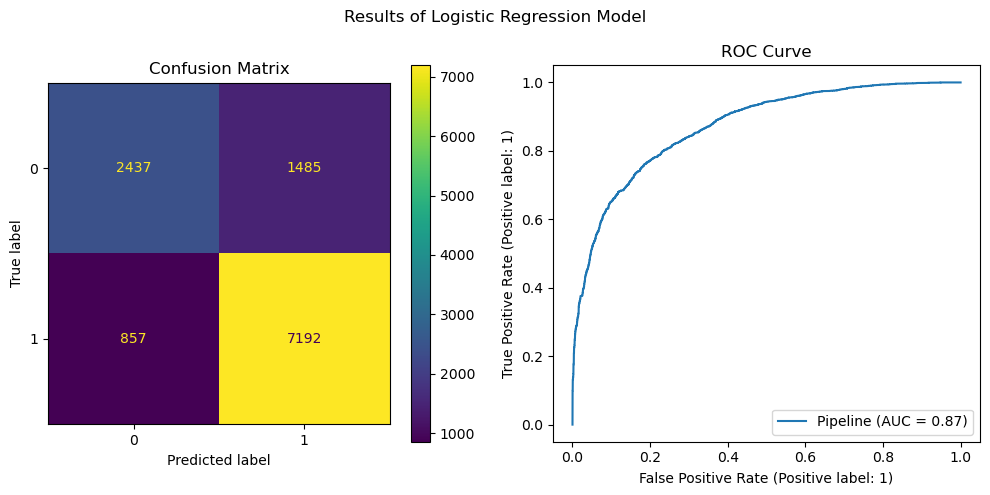

In [18]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Pull classification report on test results
logreg_report = classification_report(y_test, y_pred)
print("classification_report for logistic regression model:")
print(logreg_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for logistic regression model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of Logistic Regression Model")
plt.tight_layout()
plt.show()

<b>Comments on Logistic Regression Model:</b>
- `Accuracy score of 0.80` is better than our baseline model, but not high enough to meet stakeholders' expectations.
- The stakeholders wants to avoid overstaffing and doesn't mind understaffing. In this circumstance, our model needs to have lowest False negative rate possible, which is achieved when we have highest precision. In this model, `precision is 0.83`. Also, higher than our baseline model, but we look forward to get better results with subsequent models.

## Decision Tree Model

In [19]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('dt', DecisionTreeClassifier(random_state=817))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [3, 5, 7, 10, 15],
                  'dt__min_samples_split': [2, 5, 10],
                  'dt__min_samples_leaf': [1, 2, 4]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid)

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=817))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [3, 5, 7, 10, 15, 17],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]})

In [20]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'dt__criterion': 'entropy',
  'dt__max_depth': 17,
  'dt__min_samples_leaf': 1,
  'dt__min_samples_split': 2},
 0.8704738140046377)

In [21]:
# Instantiate the best decision tree model
best_model = best_pipe.best_estimator_

# Fit the training data to the best decision tree model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=17,
                                        random_state=817))])

Now, that our best model has been formualted, we will cross-validate the training set in 10-folds.

In [22]:
# Cross-validate
cv_dt_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print mean scores for each metric
print("Accuracy:", cv_dt_results['test_accuracy'].mean())
print("Precision:", cv_dt_results['test_precision'].mean())
print("Recall:", cv_dt_results['test_recall'].mean())
print("F1 Score:", cv_dt_results['test_f1'].mean())
print("ROC AUC Score:", cv_dt_results['test_roc_auc'].mean())

Accuracy: 0.8715850477288386
Precision: 0.9020129371110304
Recall: 0.9077773535609881
F1 Score: 0.9048053513532466
ROC AUC Score: 0.9045409639452628


We've got impressive results with our training data. Let's see if same will hold with our test data.

classification_report for decision tree model:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3922
           1       0.90      0.92      0.91      8049

    accuracy                           0.87     11971
   macro avg       0.86      0.85      0.85     11971
weighted avg       0.87      0.87      0.87     11971
 


roc_auc_score for decision tree model:
0.9026847542484081 




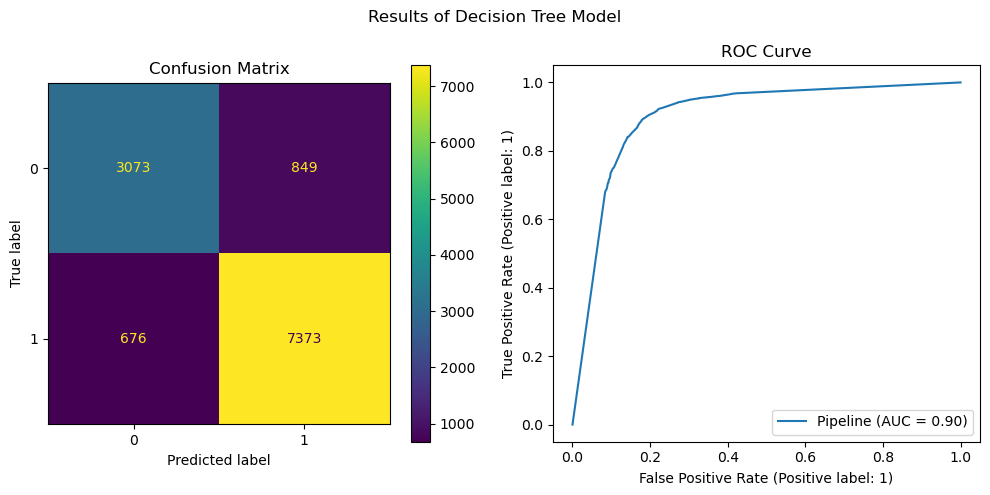

In [23]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
dt_report = classification_report(y_test, y_pred)
print("classification_report for decision tree model:")
print(dt_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for decision tree model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of Decision Tree Model")
plt.tight_layout()
plt.show()

<b>Comments on Decision Trees Model:</b>
- We are happy to see that results on the holdout set is very similar to the cross-validation results, an indication that our model is reliably consistent.
- For this model, `accuracy is 0.87` and `precision is 0.90`, yet another improvement on model's performance.

## K-Nearest-Neighbors Model

In [25]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('knn', KNeighborsClassifier())])

# Make a search-grid for the best pipeline
best_pipe_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                  'knn__weights': ['uniform', 'distance'],
                  'knn__p': [1, 2]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid)

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [27]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'knn__n_neighbors': 15, 'knn__p': 2, 'knn__weights': 'distance'},
 0.8663183412446254)

In [28]:
# Instantiate the best k-nearest neighbors model
best_model = best_pipe.best_estimator_

# Fit the training data to the best k-nearest neighbors model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                 ('numpipe',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=15, weights='distance'))])

Now perform the cross validation on training set.

In [29]:
# Cross-validate
cv_knn_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_knn_results['test_accuracy'].mean())
print("Precision:", cv_knn_results['test_precision'].mean())
print("Recall:", cv_knn_results['test_recall'].mean())
print("F1 Score:", cv_knn_results['test_f1'].mean())
print("ROC AUC Score:", cv_knn_results['test_roc_auc'].mean())

Accuracy: 0.8663183412446254
Precision: 0.886557298726182
Recall: 0.9187928551022493
F1 Score: 0.9023636076404739
ROC AUC Score: 0.925189501559618


The validation results indicate noticeably better strength at detecting false positives. Other metrics also show meaningful strength. Let's try this model on test data set.

classification_report for k-nearest neighbors model:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      3922
           1       0.88      0.92      0.90      8049

    accuracy                           0.86     11971
   macro avg       0.85      0.83      0.84     11971
weighted avg       0.86      0.86      0.86     11971
 


roc_auc_score for k-nearest neighbors model:
0.9241674955076598 




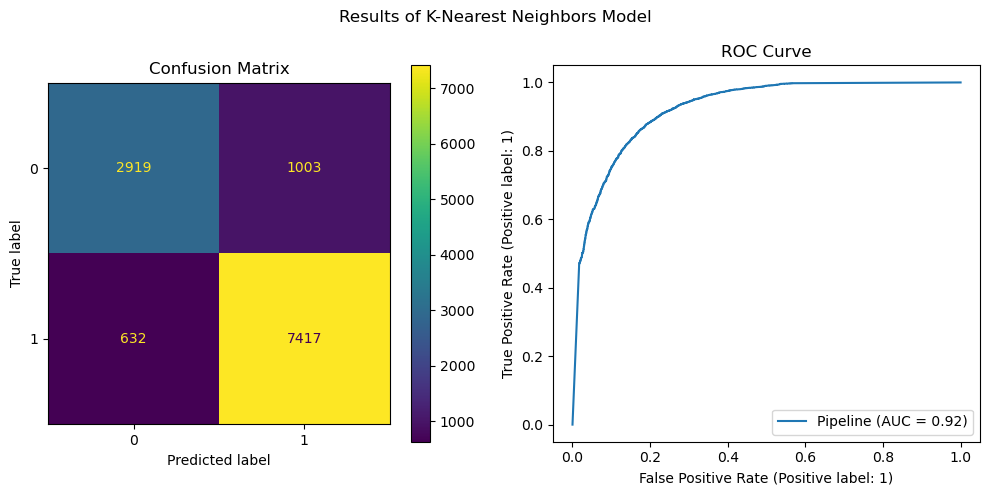

In [31]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
knn_report = classification_report(y_test, y_pred)
print("classification_report for k-nearest neighbors model:")
print(knn_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for k-nearest neighbors model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of K-Nearest Neighbors Model")
plt.tight_layout()
plt.show()

<b>Comments on K-Nearest Neighbors Model:</b>
- This model performs worse than the decision tree model in detecting false negatives. 
- It does a slightly better job at detecting false positives.

## Bayes Classification Model

In [32]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('gnb', GaussianNB())])

# Make a search-grid for the best pipeline
best_pipe_grid = {'gnb__var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid)

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                                         ('ss',
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('gnb', GaussianNB())]),
             param_grid={'gnb__var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07,
                                                1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1]})

In [33]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'gnb__var_smoothing': 0.1}, 0.5579726605391192)

In [34]:
# Instantiate the best Bayes' classification model
best_model = best_pipe.best_estimator_

# Fit the training data to the best Bayes' classification model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                   'repeated_guest']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('gnb', GaussianNB(var_smoothing=0.1))])

Perform cross-validation on training data.

In [35]:
# Cross-validate
cv_gnb_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_gnb_results['test_accuracy'].mean())
print("Precision:", cv_gnb_results['test_precision'].mean())
print("Recall:", cv_gnb_results['test_recall'].mean())
print("F1 Score:", cv_gnb_results['test_f1'].mean())
print("ROC AUC Score:", cv_gnb_results['test_roc_auc'].mean())

Accuracy: 0.5579726605391192
Precision: 0.9337772288889324
Recall: 0.36906994716510916
F1 Score: 0.5280561415011287
ROC AUC Score: 0.8184317065020416


The accuracy of prediction is worse than our baseline. It however, does surprisingly well with the metrics of our interest, precision. Let's further see how this model does on the test datta.

classification_report for bayes classification model:
              precision    recall  f1-score   support

           0       0.42      0.94      0.58      3922
           1       0.93      0.38      0.53      8049

    accuracy                           0.56     11971
   macro avg       0.68      0.66      0.56     11971
weighted avg       0.76      0.56      0.55     11971
 


roc_auc_score for bayes classification model:
0.8209067054804368 




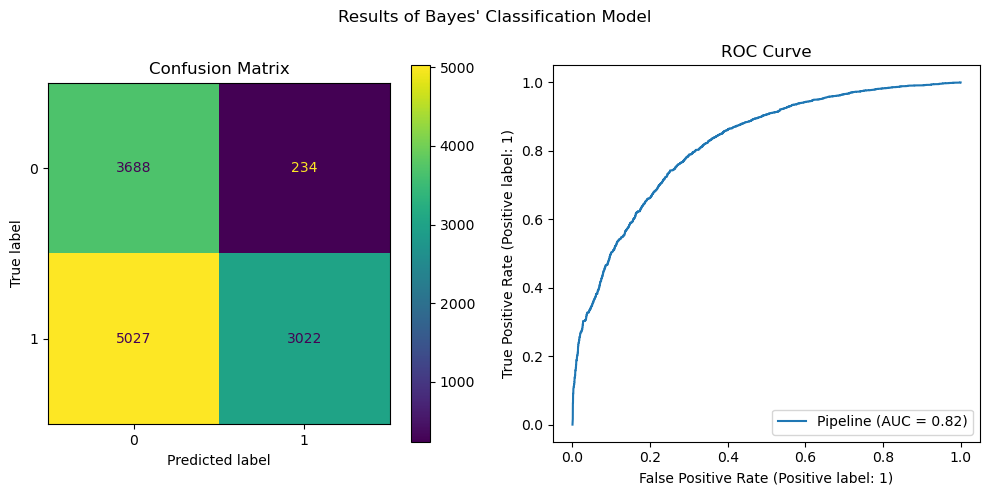

In [36]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
gnb_report = classification_report(y_test, y_pred)
print("classification_report for bayes classification model:")
print(gnb_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for bayes classification model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of Bayes' Classification Model")
plt.tight_layout()
plt.show()

<b>Comments on Bayes Classification Model:</b>
- The results on training data and test data are close which is what we want. When this model predicts that a customer will honor his reservation, it correctly predicts it 94% of time, the best performance so far. 
- However, it does terribly on overall prediction so this model alone is not reliable as its prediction on every other metrics are worse than random chances.

## Random Forests Model

In [37]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('rf', RandomForestClassifier(random_state= 817, n_estimators=150))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'rf__max_depth': [5, 10, 15],
                  'rf__min_samples_split': [1, 2, 4]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid)

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                                          StandardScaler())]),
                                                                         ['no_of_adults',
                                                                          'no_of_children',
                                                                          'no_of_weekend_nights',
                                                                          'no_of_week_nights',
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('rf',
                                        RandomForestClassifier(n_estimators=150,
                                                               random_state=817))]),
             param_grid={'rf__max_depth': [5, 10, 15],
                         'rf__min_samples_split': [1, 2, 4]})

In [38]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'rf__max_depth': 15, 'rf__min_samples_split': 1}, 0.8811305062634236)

In [39]:
# Instantiate the best random forests model
best_model = best_pipe.best_estimator_

# Fit the training data to the best Bayes' classification model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('rf',
                 RandomForestClassifier(max_depth=15, min_samples_split=1,
                                        n_estimators=150, random_state=817))])

We will now evaluate this model's performance on the train-validation folds.

In [40]:
# Cross-validate
cv_rf_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_rf_results['test_accuracy'].mean())
print("Precision:", cv_rf_results['test_precision'].mean())
print("Recall:", cv_rf_results['test_recall'].mean())
print("F1 Score:", cv_rf_results['test_f1'].mean())
print("ROC AUC Score:", cv_rf_results['test_roc_auc'].mean())

Accuracy: 0.8811305062634236
Precision: 0.8816563875360334
Recall: 0.9508595451578999
F1 Score: 0.914941876894615
ROC AUC Score: 0.9393648877884904


The overall performance is impressive with all metrics. Hopefully, this will be also true on the test data set. 

classification_report for random forests model:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3922
           1       0.88      0.95      0.91      8049

    accuracy                           0.88     11971
   macro avg       0.88      0.84      0.86     11971
weighted avg       0.88      0.88      0.88     11971
 


roc_auc_score for random forests model:
0.9379753402302788 




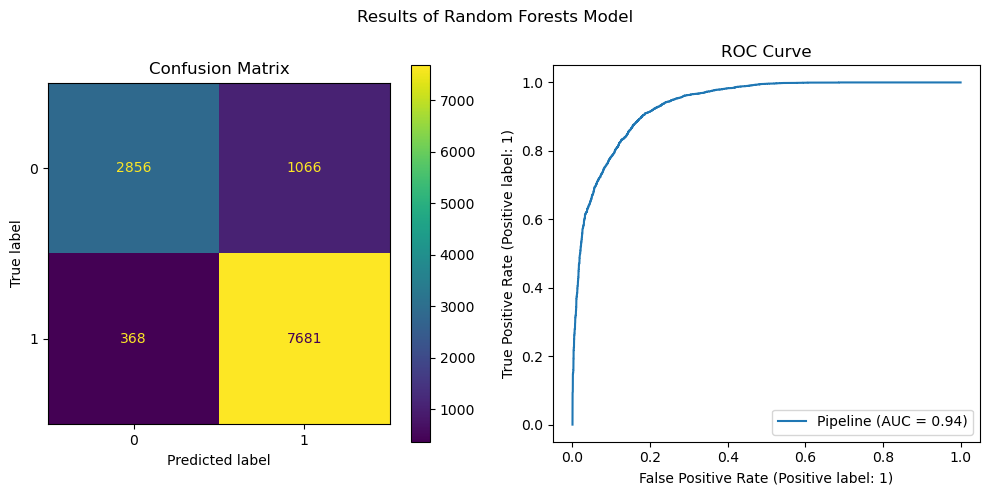

In [41]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
rf_report = classification_report(y_test, y_pred)
print("classification_report for random forests model:")
print(rf_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for random forests model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of Random Forests Model")
plt.tight_layout()
plt.show()

<b>Comments on Random Forests Model:</b>
- This model is best performing so far.
- However, this model falls short of our expectations for precision.

## XG Boost Model

In [42]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                       ('xgb', XGBClassifier(objective='binary:logistic'))])


# Make a search-grid for the best pipeline
best_pipe_grid = {'xgb__learning_rate': [0.1, 0.2, 0.3],
                  'xgb__max_depth': [3, 4, 5],
                  'xgb__n_estimators': [50, 100, 150]}


# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='roc_auc')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.1, 0.2, 0.3],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [43]:
# Check the best hyperparameter choices
best_pipe.best_params_, best_pipe.best_score_

({'xgb__learning_rate': 0.3, 'xgb__max_depth': 5, 'xgb__n_estimators': 150},
 0.9464756443498981)

In [44]:
# Instantiate the best xgboost model
best_model = best_pipe.best_estimator_

# Fit the training data to the best xgboost model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=150, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

Now, the best model is ready for cross validation.

In [47]:
# Cross-validate
cv_xgb_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_xgb_results['test_accuracy'].mean())
print("Precision:", cv_xgb_results['test_precision'].mean())
print("Recall:", cv_xgb_results['test_recall'].mean())
print("F1 Score:", cv_xgb_results['test_f1'].mean())
print("ROC AUC Score:", cv_xgb_results['test_roc_auc'].mean())

Accuracy: 0.8880019907470886
Precision: 0.8990859604060841
Recall: 0.9389266691371055
F1 Score: 0.9185261212927596
ROC AUC Score: 0.9478810079279331


This is impressive metrics all over. Let's try this model on the test data.

classification_report for xg boost model:
              precision    recall  f1-score   support

           0       0.86      0.77      0.82      3922
           1       0.90      0.94      0.92      8049

    accuracy                           0.89     11971
   macro avg       0.88      0.86      0.87     11971
weighted avg       0.89      0.89      0.88     11971
 


roc_auc_score for xg boost model:
0.9451308371360551 




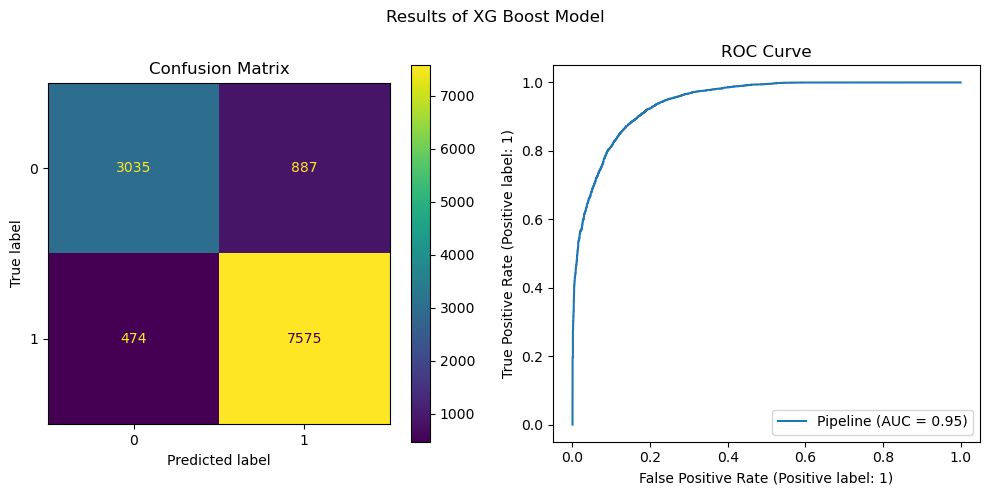

In [48]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
xgb_report = classification_report(y_test, y_pred)
print("classification_report for xg boost model:")
print(xgb_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for xg boost model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of XG Boost Model")
plt.tight_layout()
plt.show()

<b>Comments on XG Boost Model:</b>
- This model has done the best job at predicting.
- While we are happy with all metrics, we want to know if we can improve precision a slightly more.
- We will tune hyperparamets with this model to see if we can come up with an improved model, especially better at precision.

## Second XG Boost Model

In this model we will leave only the best of hyperparameters from the previous model and add untested hyperparameters to see if it can improve the model.

In [49]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                       ('xgb', XGBClassifier(objective='binary:logistic'))])


# Make a search-grid for the best pipeline
best_pipe_grid = {'xgb__learning_rate': [0.3, 0.4, 0.5],
                  'xgb__max_depth': [5, 7, 9],
                  'xgb__n_estimators': [150, 200, 250]}


# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='roc_auc')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.3, 0.4, 0.5],
                         'xgb__max_depth': [5, 7, 9],
                         'xgb__n_estimators': [150, 200, 250]},
             scoring='roc_auc')

In [50]:
# Check the best hyperparameter choices
best_pipe.best_params_, best_pipe.best_score_

({'xgb__learning_rate': 0.3, 'xgb__max_depth': 9, 'xgb__n_estimators': 150},
 0.9509898026261885)

In [51]:
# Instantiate the best xgboost model
best_model = best_pipe.best_estimator_

# Fit the training data to the best xgboost model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=9, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=150, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

The best model suggests we can leave `learning_rate` at 0.3 and `n_estimators` at 150.
Let's see model's performance with cross validation

In [53]:
# Cross-validate
cv_xgb2_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_xgb2_results['test_accuracy'].mean())
print("Precision:", cv_xgb2_results['test_precision'].mean())
print("Recall:", cv_xgb2_results['test_recall'].mean())
print("F1 Score:", cv_xgb2_results['test_f1'].mean())
print("ROC AUC Score:", cv_xgb2_results['test_roc_auc'].mean())

Accuracy: 0.8933095831788641
Precision: 0.9103142836851534
Recall: 0.9332965387653045
F1 Score: 0.9216492587524655
ROC AUC Score: 0.9516673235732022


We are seeing improved metrics. Let's test the model on test data.

classification_report for the second xg boost model:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3922
           1       0.90      0.94      0.92      8049

    accuracy                           0.89     11971
   macro avg       0.88      0.87      0.87     11971
weighted avg       0.89      0.89      0.89     11971
 


roc_auc_score for the second xg boost model:
0.950566770118947 




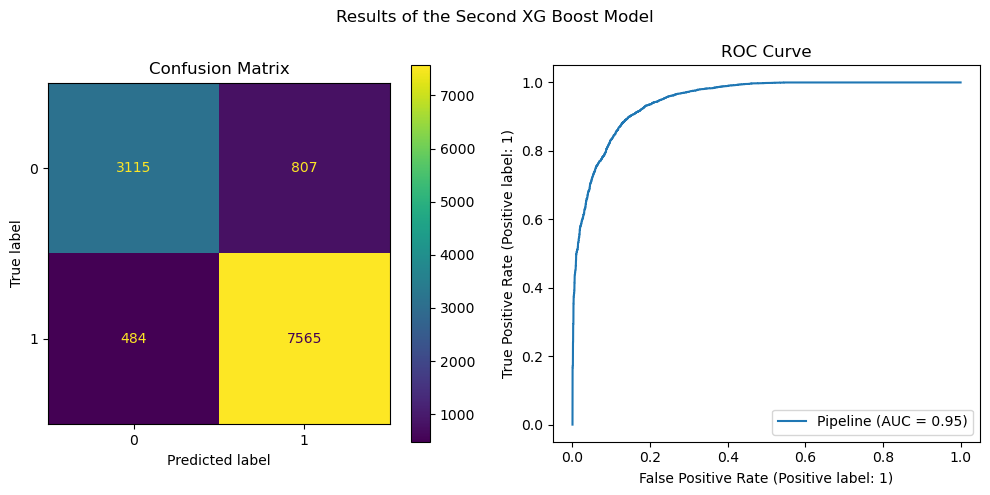

In [54]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
xgb2_report = classification_report(y_test, y_pred)
print("classification_report for the second xg boost model:")
print(xgb2_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for the second xg boost model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of the Second XG Boost Model")
plt.tight_layout()
plt.show()

<b>Comments on the Second XG Boost Model:</b>

- We were able to increase precision. 
- While leaving `learning_rate` and `n_estimators` unchanged, we want to try different hyperparameters that could potentially bring better results.

## Third XG Boost Model

In [56]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                       ('xgb', XGBClassifier(objective='binary:logistic', learning_rate=0.3, n_estimators=150))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'xgb__max_depth': [9, 12, 15],
                  'xgb__gamma': [1, 10, 100],
                  'xgb__colsample_bytree': [0.5, 0.75, 1]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='roc_auc')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.5, 0.75, 1],
                         'xgb__gamma': [1, 10, 100],
                         'xgb__max_depth': [9, 12, 15]},
             scoring='roc_auc')

In [57]:
# Check the best hyperparameter choices
best_pipe.best_params_, best_pipe.best_score_

({'xgb__colsample_bytree': 0.75, 'xgb__gamma': 1, 'xgb__max_depth': 12},
 0.9509083726942761)

In [58]:
# Instantiate the best xgboost model
best_model = best_pipe.best_estimator_

# Fit the training data to the best xgboost model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=12, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=150, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [60]:
# Cross-validate
cv_xgb3_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_xgb3_results['test_accuracy'].mean())
print("Precision:", cv_xgb3_results['test_precision'].mean())
print("Recall:", cv_xgb3_results['test_recall'].mean())
print("F1 Score:", cv_xgb3_results['test_f1'].mean())
print("ROC AUC Score:", cv_xgb3_results['test_roc_auc'].mean())

Accuracy: 0.8937624273571986
Precision: 0.9085668064674598
Recall: 0.9362948656043779
F1 Score: 0.9221888582478537
ROC AUC Score: 0.9524112311414544


classification_report for the second xg boost model:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      3922
           1       0.90      0.94      0.92      8049

    accuracy                           0.89     11971
   macro avg       0.88      0.87      0.87     11971
weighted avg       0.89      0.89      0.89     11971
 


roc_auc_score for the second xg boost model:
0.9516081669331692 




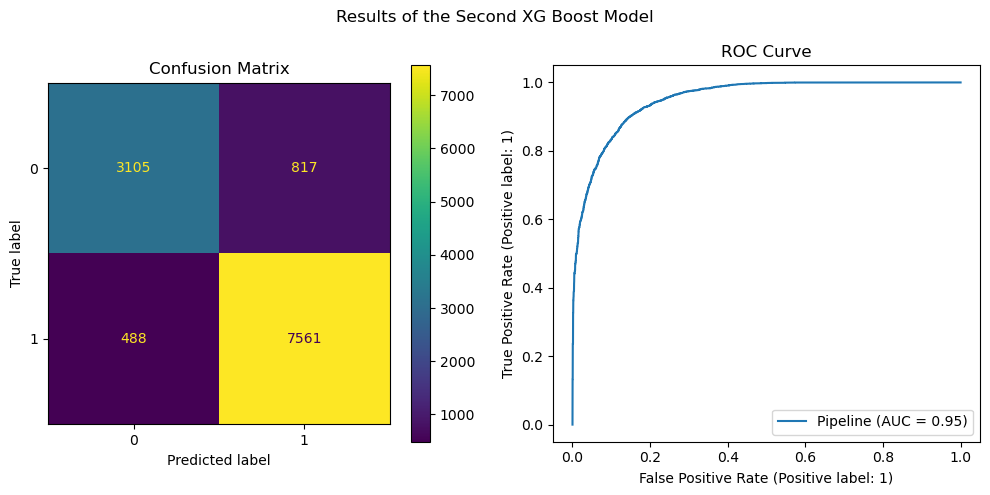

In [61]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
xgb3_report = classification_report(y_test, y_pred)
print("classification_report for the second xg boost model:")
print(xgb3_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for the second xg boost model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of the Second XG Boost Model")
plt.tight_layout()
plt.show()

<b>Comments on the Third XG Boost Model:</b>

- The overall prediction power

# 4th

In [62]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                       ('xgb', XGBClassifier(objective='binary:logistic', learning_rate=0.3, n_estimators=150))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'xgb__max_depth': [11, 12, 13],
                  'xgb__gamma': [0.5, 1, 1.5],
                  'xgb__colsample_bytree': [0.70, 0.75, 0.8]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='roc_auc')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__colsample_bytree': [0.7, 0.75, 0.8],
                         'xgb__gamma': [0.5, 1, 1.5],
                         'xgb__max_depth': [11, 12, 13]},
             scoring='roc_auc')

In [63]:
# Check the best hyperparameter choices
best_pipe.best_params_, best_pipe.best_score_

({'xgb__colsample_bytree': 0.8, 'xgb__gamma': 1, 'xgb__max_depth': 11},
 0.9513449449458549)

In [64]:
# Instantiate the best xgboost model
best_model = best_pipe.best_estimator_

# Fit the training data to the best xgboost model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=11, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=150, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [65]:
# Cross-validate
cv_xgb4_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# print mean scores for each metric
print("Accuracy:", cv_xgb4_results['test_accuracy'].mean())
print("Precision:", cv_xgb4_results['test_precision'].mean())
print("Recall:", cv_xgb4_results['test_recall'].mean())
print("F1 Score:", cv_xgb4_results['test_f1'].mean())
print("ROC AUC Score:", cv_xgb4_results['test_roc_auc'].mean())

Accuracy: 0.8946260154756887
Precision: 0.9083675013274943
Recall: 0.9379472898161769
F1 Score: 0.9228958861343513
ROC AUC Score: 0.9526285986953992


classification_report for the second xg boost model:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3922
           1       0.90      0.94      0.92      8049

    accuracy                           0.89     11971
   macro avg       0.88      0.86      0.87     11971
weighted avg       0.89      0.89      0.89     11971
 


roc_auc_score for the second xg boost model:
0.9500432840945081 




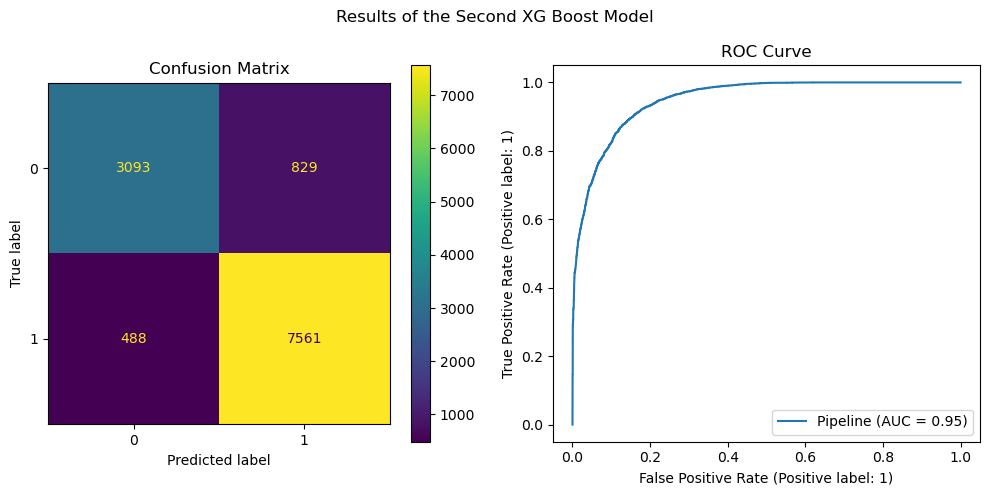

In [66]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
xgb4_report = classification_report(y_test, y_pred)
print("classification_report for the second xg boost model:")
print(xgb4_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for the second xg boost model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of the Second XG Boost Model")
plt.tight_layout()
plt.show()

## Second Decision Tree

In [78]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                      ('dt2', DecisionTreeClassifier(random_state=817))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'dt2__criterion': ['gini', 'entropy'],
                  'dt2__max_depth': [15, 16, 17, 18, 19],
                  'dt2__min_samples_leaf': [1, 2, 4],
                  'dt2__min_samples_split': [2, 3, 4, 5]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='precision')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                                          'lead_time',
                                                                          'no_of_previous_cancellations',
                                                                          'no_of_previous_bookings_not_canceled',
                                                                          'avg_price_per_room',
                                                                          'no_of_special_requests'])])),
                                       ('dt2',
                                        DecisionTreeClassifier(random_state=817))]),
             param_grid={'dt2__criterion': ['gini', 'entropy'],
                         'dt2__max_depth': [15, 16, 17, 18, 19],
                         'dt2__min_samples_leaf': [1, 2, 4],
                         'dt2__min_samples_split': [2, 3, 4, 5]},
             scoring='precision')

In [79]:
# Check the best hyperparameters choice
best_pipe.best_params_, best_pipe.best_score_

({'dt2__criterion': 'gini',
  'dt2__max_depth': 18,
  'dt2__min_samples_leaf': 2,
  'dt2__min_samples_split': 2},
 0.9048881958661429)

In [80]:
# Instantiate the best decision tree model
best_model = best_pipe.best_estimator_

# Fit the training data to the best decision tree model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'lead_time',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests'])])),
                ('dt2',
                 DecisionTreeClassifier(max_depth=18, min_samples_leaf=2,
                                        random_state=817))])

In [81]:
# Cross-validate
cv_dt2_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print mean scores for each metric
print("Accuracy:", cv_dt2_results['test_accuracy'].mean())
print("Precision:", cv_dt2_results['test_precision'].mean())
print("Recall:", cv_dt2_results['test_recall'].mean())
print("F1 Score:", cv_dt2_results['test_f1'].mean())
print("ROC AUC Score:", cv_dt2_results['test_roc_auc'].mean())

Accuracy: 0.8650022260479776
Precision: 0.9052164852966434
Recall: 0.8929065088580208
F1 Score: 0.8989259701678136
ROC AUC Score: 0.9058846227837998


classification_report for decision tree model:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3922
           1       0.90      0.90      0.90      8049

    accuracy                           0.87     11971
   macro avg       0.85      0.85      0.85     11971
weighted avg       0.87      0.87      0.87     11971
 


roc_auc_score for decision tree model:
0.9041021943046571 




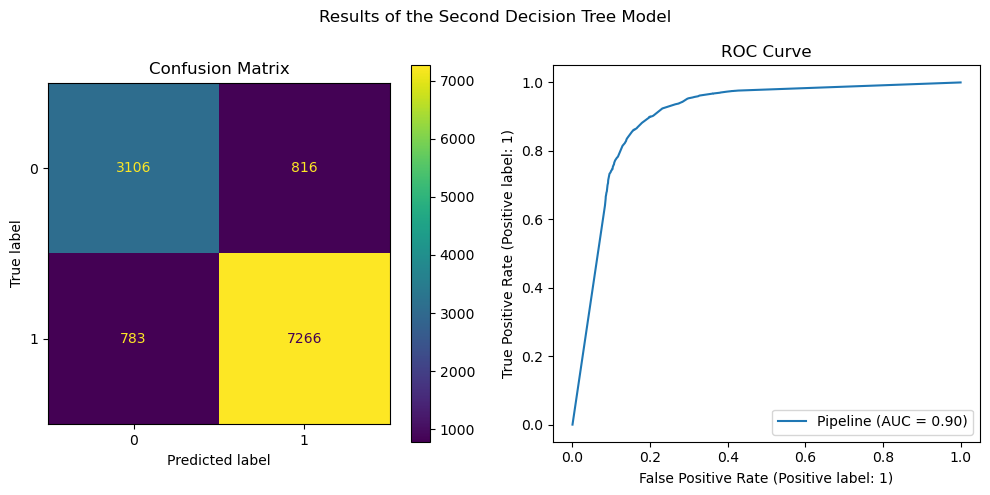

In [82]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
dt2_report = classification_report(y_test, y_pred)
print("classification_report for decision tree model:")
print(dt2_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for decision tree model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of the Second Decision Tree Model")
plt.tight_layout()
plt.show()

# Second XG Boost

In [83]:
# Define pipelines for numerical and nominal columns separately
numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy = 'mean')), 
                             ('ss', StandardScaler())])
nominal_pipeline = Pipeline([('ohe_imputer', SimpleImputer(strategy = 'most_frequent')),
                             ('ohe', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown='ignore'))])

# Instantiate column-transformer
ct = ColumnTransformer([("nominalpipe", nominal_pipeline, nominal_cols),
                        ("numpipe", numeric_pipeline, numeric_cols)])

# Make a final pipeline
final_pipe = Pipeline([('preprocess', ct),
                       ('xgb2', XGBClassifier(objective='binary:logistic', learning_rate=0.3, n_estimators=150))])

# Make a search-grid for the best pipeline
best_pipe_grid = {'xgb2__learning_rate': [0.25, 0.3, 0.35],
                  'xgb2__n_estimators': [125, 150, 175],
                  'xgb2__max_depth': [9, 12, 15],
                  'xgb2__gamma': [1, 10, 100],
                  'xgb2__colsample_bytree': [0.5, 0.75, 1]}

# Build the best pipeline
best_pipe = GridSearchCV(estimator=final_pipe, 
                         param_grid=best_pipe_grid,
                         scoring='precision')

# Fit 
best_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('ohe_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['type_of_meal_plan',
                                                                          'required_car_parking_space',
                                                                          'room_type_reserved',
                                                                          'arrival_month',
                                                                          'arrival_...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=150,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb2__colsample_bytree': [0.5, 0.75, 1],
                         'xgb2__gamma': [1, 10, 100],
                         'xgb2__learning_rate': [0.25, 0.3, 0.35],
                         'xgb2__max_depth': [9, 12, 15],
                         'xgb2__n_estimators': [125, 150, 175]},
             scoring='precision')

In [84]:
# Check the best hyperparameter choices
best_pipe.best_params_, best_pipe.best_score_

({'xgb2__colsample_bytree': 0.75,
  'xgb2__gamma': 1,
  'xgb2__learning_rate': 0.3,
  'xgb2__max_depth': 15,
  'xgb2__n_estimators': 175},
 0.9090205172249363)

In [85]:
# Instantiate the best xgboost model
best_model = best_pipe.best_estimator_

# Fit the training data to the best xgboost model
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['type_of_meal_plan',
                                                   'required_car_parking_space',
                                                   'room_type_reserved',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'market_segment_t...
                               feature_types=None, gamma=1, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.3,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=15, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=175, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [86]:
# Cross-validate
cv_xgb2_results = cross_validate(best_model, X_train, y_train, cv=10, 
                                scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print mean scores for each metric
print("Accuracy:", cv_xgb2_results['test_accuracy'].mean())
print("Precision:", cv_xgb2_results['test_precision'].mean())
print("Recall:", cv_xgb2_results['test_recall'].mean())
print("F1 Score:", cv_xgb2_results['test_f1'].mean())
print("ROC AUC Score:", cv_xgb2_results['test_roc_auc'].mean())

Accuracy: 0.8940914084704934
Precision: 0.9095335719554447
Recall: 0.9356215961281483
F1 Score: 0.9223622404237395
ROC AUC Score: 0.9521406837976979


classification_report for decision tree model:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3922
           1       0.90      0.94      0.92      8049

    accuracy                           0.89     11971
   macro avg       0.89      0.87      0.88     11971
weighted avg       0.89      0.89      0.89     11971
 


roc_auc_score for decision tree model:
0.9517768177815015 




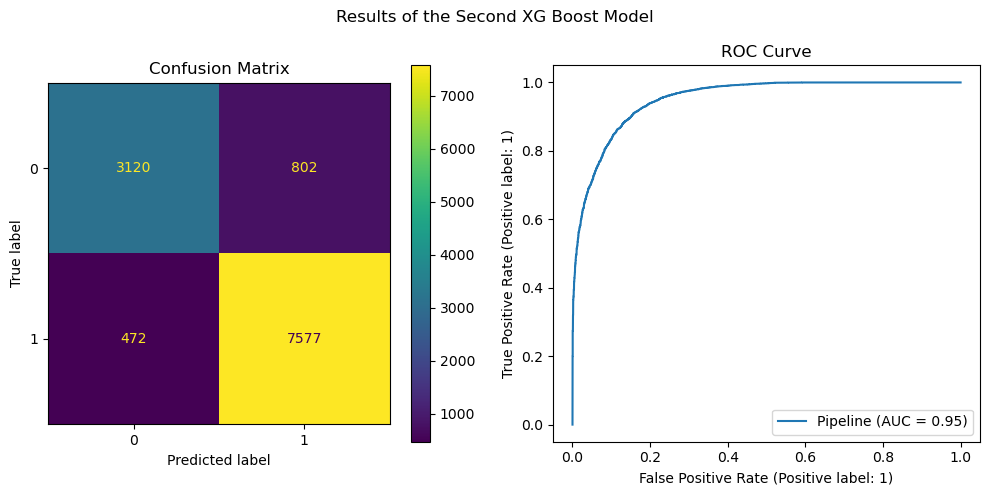

In [87]:
# Predict y-values
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Pull classification report on test results
xgb2_report = classification_report(y_test, y_pred)
print("classification_report for decision tree model:")
print(xgb2_report, '\n\n')

# Calculate the ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("roc_auc_score for decision tree model:")
print(auc, '\n\n')

# Display visualizations on test results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot confusion matrix on the left
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax[0])
cm_display.ax_.set_title("Confusion Matrix")

# Plot ROC curve on the right
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
roc_display.ax_.set_title("ROC Curve")

# Display
plt.suptitle("Results of the Second XG Boost Model")
plt.tight_layout()
plt.show()